In [0]:
import numpy as np
import matplotlib.pyplot as plt
import copy

## Part1

In [0]:
A = np.array([
    -1, -1, -1, +1, -1, -1, -1,
    -1, -1, -1, +1, -1, -1, -1,
    -1, -1, +1, -1, +1, -1, -1,
    -1, -1, +1, -1, +1, -1, -1,
    -1, -1, +1, +1, +1, -1, -1,
    -1, +1, -1, -1, -1, +1, -1,
    -1, +1, -1, -1, -1, +1, -1,
    +1, -1, -1, -1, -1, -1, +1,
    +1, -1, -1, -1, -1, -1, +1
])

B = np.array([
    +1, +1, +1, +1, +1, -1, -1,
    +1, -1, -1, -1, -1, +1, -1,
    +1, -1, -1, -1, -1, -1, +1,
    +1, -1, -1, -1, -1, +1, -1,
    +1, +1, +1, +1, +1, -1, -1,
    +1, -1, -1, -1, -1, +1, -1,
    +1, -1, -1, -1, -1, -1, +1,
    +1, -1, -1, -1, -1, +1, -1,
    +1, +1, +1, +1, +1, -1, -1
])

C = np.array([
    -1, -1, +1, +1, +1, -1, -1,
    -1, +1, -1, -1, -1, +1, -1,
    +1, -1, -1, -1, -1, -1, +1,
    +1, -1, -1, -1, -1, -1, -1,
    +1, -1, -1, -1, -1, -1, -1,
    +1, -1, -1, -1, -1, -1, -1,
    +1, -1, -1, -1, -1, -1, +1,
    -1, +1, -1, -1, -1, +1, -1,
    -1, -1, +1, +1, +1, -1, -1
])

In [0]:
a = np.array([
    -1, +1, -1,
    +1, -1, +1, 
    +1, +1, +1,
    +1, -1, +1,
    +1, -1, +1
])

b = np.array([
    +1, +1, -1,
    +1, -1, +1, 
    +1, +1, -1,
    +1, -1, +1,
    +1, +1, -1
])

c = np.array([
    +1, +1, +1,
    +1, -1, -1, 
    +1, -1, -1,
    +1, -1, -1,
    +1, +1, +1
])

In [0]:
def print_char(matrix, cols, rows):
  shape = []
  for i in range(rows):
    l = []
    for j in range(cols):
      if matrix[i*3 + j] == -1:
        l.append(". ")
      elif matrix[i*3 + j] == 1:
        l.append("# ")
    # shape.append(l)
    print(l)
  # print(shape)


In [0]:
def activation_function(x):
  return 2*(x>=0) - 1

In [0]:
A = A.reshape(-1, 1)
a = a.reshape(-1, 1)
B = B.reshape(-1, 1)
b = b.reshape(-1, 1)
C = C.reshape(-1, 1)
c = c.reshape(-1, 1)

In [0]:
def make_weight_matrix(inputs, outputs):
  o = 0
  for i in range(len(inputs)):
    m = np.matmul(inputs[i], outputs[i].T)
    o += m
  return o


In [0]:
weight = make_weight_matrix([A, B, C], [a, b, c])


In [0]:
def make_predictions(input_pattern, weight, activation_function):
  return activation_function(np.matmul(input_pattern.T, weight)).T
  

Text(0.5, 1.0, 'desire output for input = A')

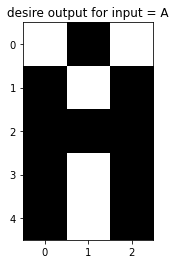

In [11]:
plt.imshow(a.reshape(5, 3), cmap='Greys')
plt.title("desire output for input = A")

Text(0.5, 1.0, 'output of network for input = A')

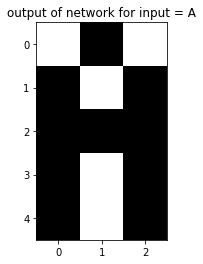

In [12]:
prediction_A = make_predictions(A, weight, activation_function)
plt.imshow(prediction_A.reshape(5, 3), cmap='Greys')
plt.title("output of network for input = A")

Text(0.5, 1.0, 'desire output for input = B')

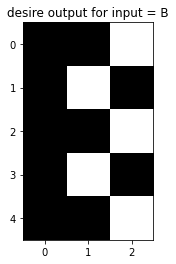

In [13]:
plt.imshow(b.reshape(5, 3), cmap='Greys')
plt.title("desire output for input = B")

Text(0.5, 1.0, 'output of network for input = B ')

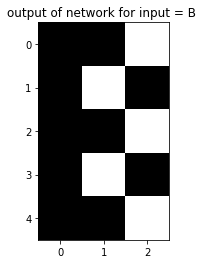

In [14]:
prediction_B = make_predictions(B, weight, activation_function)
plt.imshow(prediction_B.reshape(5, 3), cmap='Greys')
plt.title("output of network for input = B ")

Text(0.5, 1.0, 'desire output for input = C')

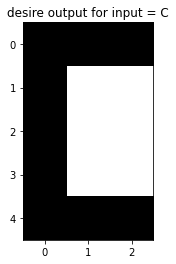

In [15]:
plt.imshow(c.reshape(5, 3), cmap='Greys')
plt.title("desire output for input = C")

Text(0.5, 1.0, 'output of network for input = C ')

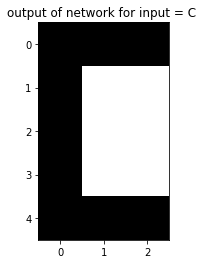

In [16]:
prediction_C = make_predictions(C, weight, activation_function)
plt.imshow(prediction_C.reshape(5, 3), cmap='Greys')
plt.title("output of network for input = C ")

## Part2

In [0]:
def make_noise(array, n):
  copy_array = copy.deepcopy(array)
  sample_size = int(n * len(copy_array))
  sample = np.random.choice(len(copy_array), sample_size, replace=False)
  copy_array[sample] = -1 * copy_array[sample]
  return copy_array

In [0]:
def check_disturbed_inputs(n, inputs, desire_outputs, weight, activation_function):
  correct = 0
  for i in range(1000):
    outputs = []
    for j in range(len(inputs)):
      s = make_noise(inputs[j], n)
      prediction =  make_predictions(s, weight, activation_function)
      outputs.append(prediction)
    validation = 1
    for j in range(len(outputs)):
      if sum(outputs[j] == desire_outputs[j]) != len(desire_outputs[j]):
        validation = -1
    if validation == 1:
      correct += 1
  print("accuracy of network is: ", correct / 1000)

In [19]:
check_disturbed_inputs(0.2, [A, B, C], [a, b, c], weight, activation_function)


accuracy of network is:  0.928


In [20]:
check_disturbed_inputs(0.2, [A, B, C], [a, b, c], weight, activation_function)


accuracy of network is:  0.919


## Part3

In [0]:
def make_missing(array, n):
  copy_array = copy.deepcopy(array)
  sample_size = int(n * len(copy_array))
  sample = np.random.choice(len(copy_array), sample_size, replace=False)
  copy_array[sample] = 0
  return copy_array

In [0]:
def check_missed_inputs(n, inputs, desire_outputs, weight, activation_function):
  correct = 0
  for i in range(1000):
    outputs = []
    for j in range(len(inputs)):
      s = make_missing(inputs[j], n)
      prediction =  make_predictions(s, weight, activation_function)
      outputs.append(prediction)
    validation = 1
    for j in range(len(outputs)):
      if sum(outputs[j] == desire_outputs[j]) != len(desire_outputs[j]):
        validation = -1
    if validation == 1:
      correct += 1
  print("accuracy of network is: ", correct / 1000)

In [23]:
check_missed_inputs(0.2, [A, B, C], [a, b, c], weight, activation_function)


accuracy of network is:  1.0


In [24]:
check_missed_inputs(0.4, [A, B, C], [a, b, c], weight, activation_function)


accuracy of network is:  0.999


## Part4

In [0]:
def check_noisy_missed_inputs(inputs, desire_outputs, activation_function, weight):
  noisy_accuracy = []
  missed_accuracy = []
  epochs = np.arange(0, 1 ,0.01)
  for e in epochs:
      noisy_correct = 0
      missed_correct = 0
      for i in range(1000):
          valid = 1
          for j in range(len(inputs)):
            noisy_data = make_noise(inputs[j], e)
            prediction =  make_predictions(noisy_data, weight, activation_function)
            if sum(prediction == desire_outputs[j]) != len(desire_outputs[j]):
              valid = -1
          if valid == 1:
            noisy_correct +=1
         
          valid2 = 1
          for j in range(len(inputs)):
            missed_data = make_missing(inputs[j], e)
            prediction = make_predictions(missed_data, weight, activation_function)
            if sum(prediction == desire_outputs[j]) != len(desire_outputs[j]):
              valid2 = -1
          if valid2 == 1:
            missed_correct +=1
         
      noisy_accuracy += [noisy_correct/1000]
      missed_accuracy += [missed_correct/1000]
  return noisy_accuracy, missed_accuracy, epochs

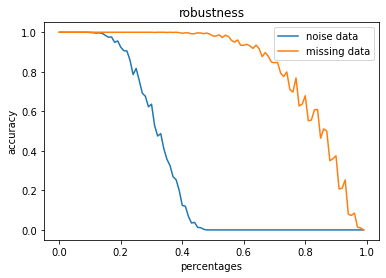

In [26]:
noisy_accuracy, missed_accuracy, epochs = check_noisy_missed_inputs([A, B, C], [a, b, c], activation_function, weight)
plt.plot(epochs, noisy_accuracy, label='noise data')
plt.plot(epochs, missed_accuracy, label='missing data')
plt.title('robustness')
plt.xlabel('percentages')
plt.ylabel('accuracy')
plt.legend()

## Part5

In [0]:
def Max_robustness(inputs, desire_outputs, weight, activation_function):
  epochs = np.arange(0.1, 0.2 ,0.001)
  n = 10000
  noisy_accuracy = []

  for e in epochs:
      noisy_correct = 0
      for i in range(10000):
        valid = 1
        for j in range(len(inputs)):
            noisy_data = make_noise(inputs[j], e)
            prediction =  make_predictions(noisy_data, weight, activation_function)
            if sum(prediction == desire_outputs[j]) != len(desire_outputs[j]):
              valid = -1
        if valid == 1:
          noisy_correct +=1
      noisy_accuracy += [noisy_correct/10000]
  return noisy_accuracy, epochs

In [0]:
noisy_accuracy, epochs = Max_robustness([A, B, C], [a, b, c], weight, activation_function)


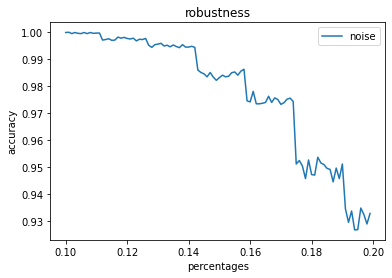

In [29]:
plt.plot(epochs, noisy_accuracy, label='noise')
plt.title('robustness')
plt.xlabel('percentages')
plt.ylabel('accuracy')
plt.legend()